In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
grocery_items = set()
with open(r"C:\Users\SKI\Documents\FAI project\Market-Basket-Analysis-master\grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open(r"C:\Users\SKI\Documents\FAI project\Market-Basket-Analysis-master\grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

,specialty bar,specialty vegetables,female sanitary products,chocolate,chewing gum,white bread,ketchup,sugar,baby cosmetics,canned beer,...,rum,photo/film,organic products,seasonal products,make up remover,fish,cereals,butter,misc. beverages,processed cheese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
grocery.columns.tolist()

['specialty bar',
 'specialty vegetables',
 'female sanitary products',
 'chocolate',
 'chewing gum',
 'white bread',
 'ketchup',
 'sugar',
 'baby cosmetics',
 'canned beer',
 'dessert',
 'other vegetables',
 'pet care',
 'pickled vegetables',
 'cream',
 'whipped/sour cream',
 'mustard',
 'potato products',
 'snack products',
 'cooking chocolate',
 'nuts/prunes',
 'herbs',
 'cookware',
 'salad dressing',
 'liqueur',
 'rice',
 'sauces',
 'organic sausage',
 'kitchen utensil',
 'jam',
 'soda',
 'spread cheese',
 'flower (seeds)',
 'napkins',
 'liquor (appetizer)',
 'tea',
 'beef',
 'toilet cleaner',
 'artif. sweetener',
 'canned vegetables',
 'sparkling wine',
 'liquor',
 'light bulbs',
 'canned fish',
 'oil',
 'meat spreads',
 'rubbing alcohol',
 'frozen fruits',
 'finished products',
 'bottled beer',
 'cake bar',
 'beverages',
 'long life bakery product',
 'onions',
 'waffles',
 'sausage',
 'tidbits',
 'instant coffee',
 'packaged fruit/vegetables',
 'frozen fish',
 'softener',
 'cat f

In [4]:
frequent_itemsets = apriori(grocery, min_support=0.01, use_colnames=True)

C:\Users\SKI\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [6]:
#viewing top 100 rules
my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(chocolate),0.193493,0.049619,0.012710,0.065686,1.323810,0.003109,1.017197
1,(chocolate),(other vegetables),0.049619,0.193493,0.012710,0.256148,1.323810,0.003109,1.084230
2,(soda),(chocolate),0.174377,0.049619,0.013523,0.077551,1.562939,0.004871,1.030281
3,(chocolate),(soda),0.049619,0.174377,0.013523,0.272541,1.562939,0.004871,1.134941
4,(chocolate),(whole milk),0.049619,0.255516,0.016675,0.336066,1.315243,0.003997,1.121322


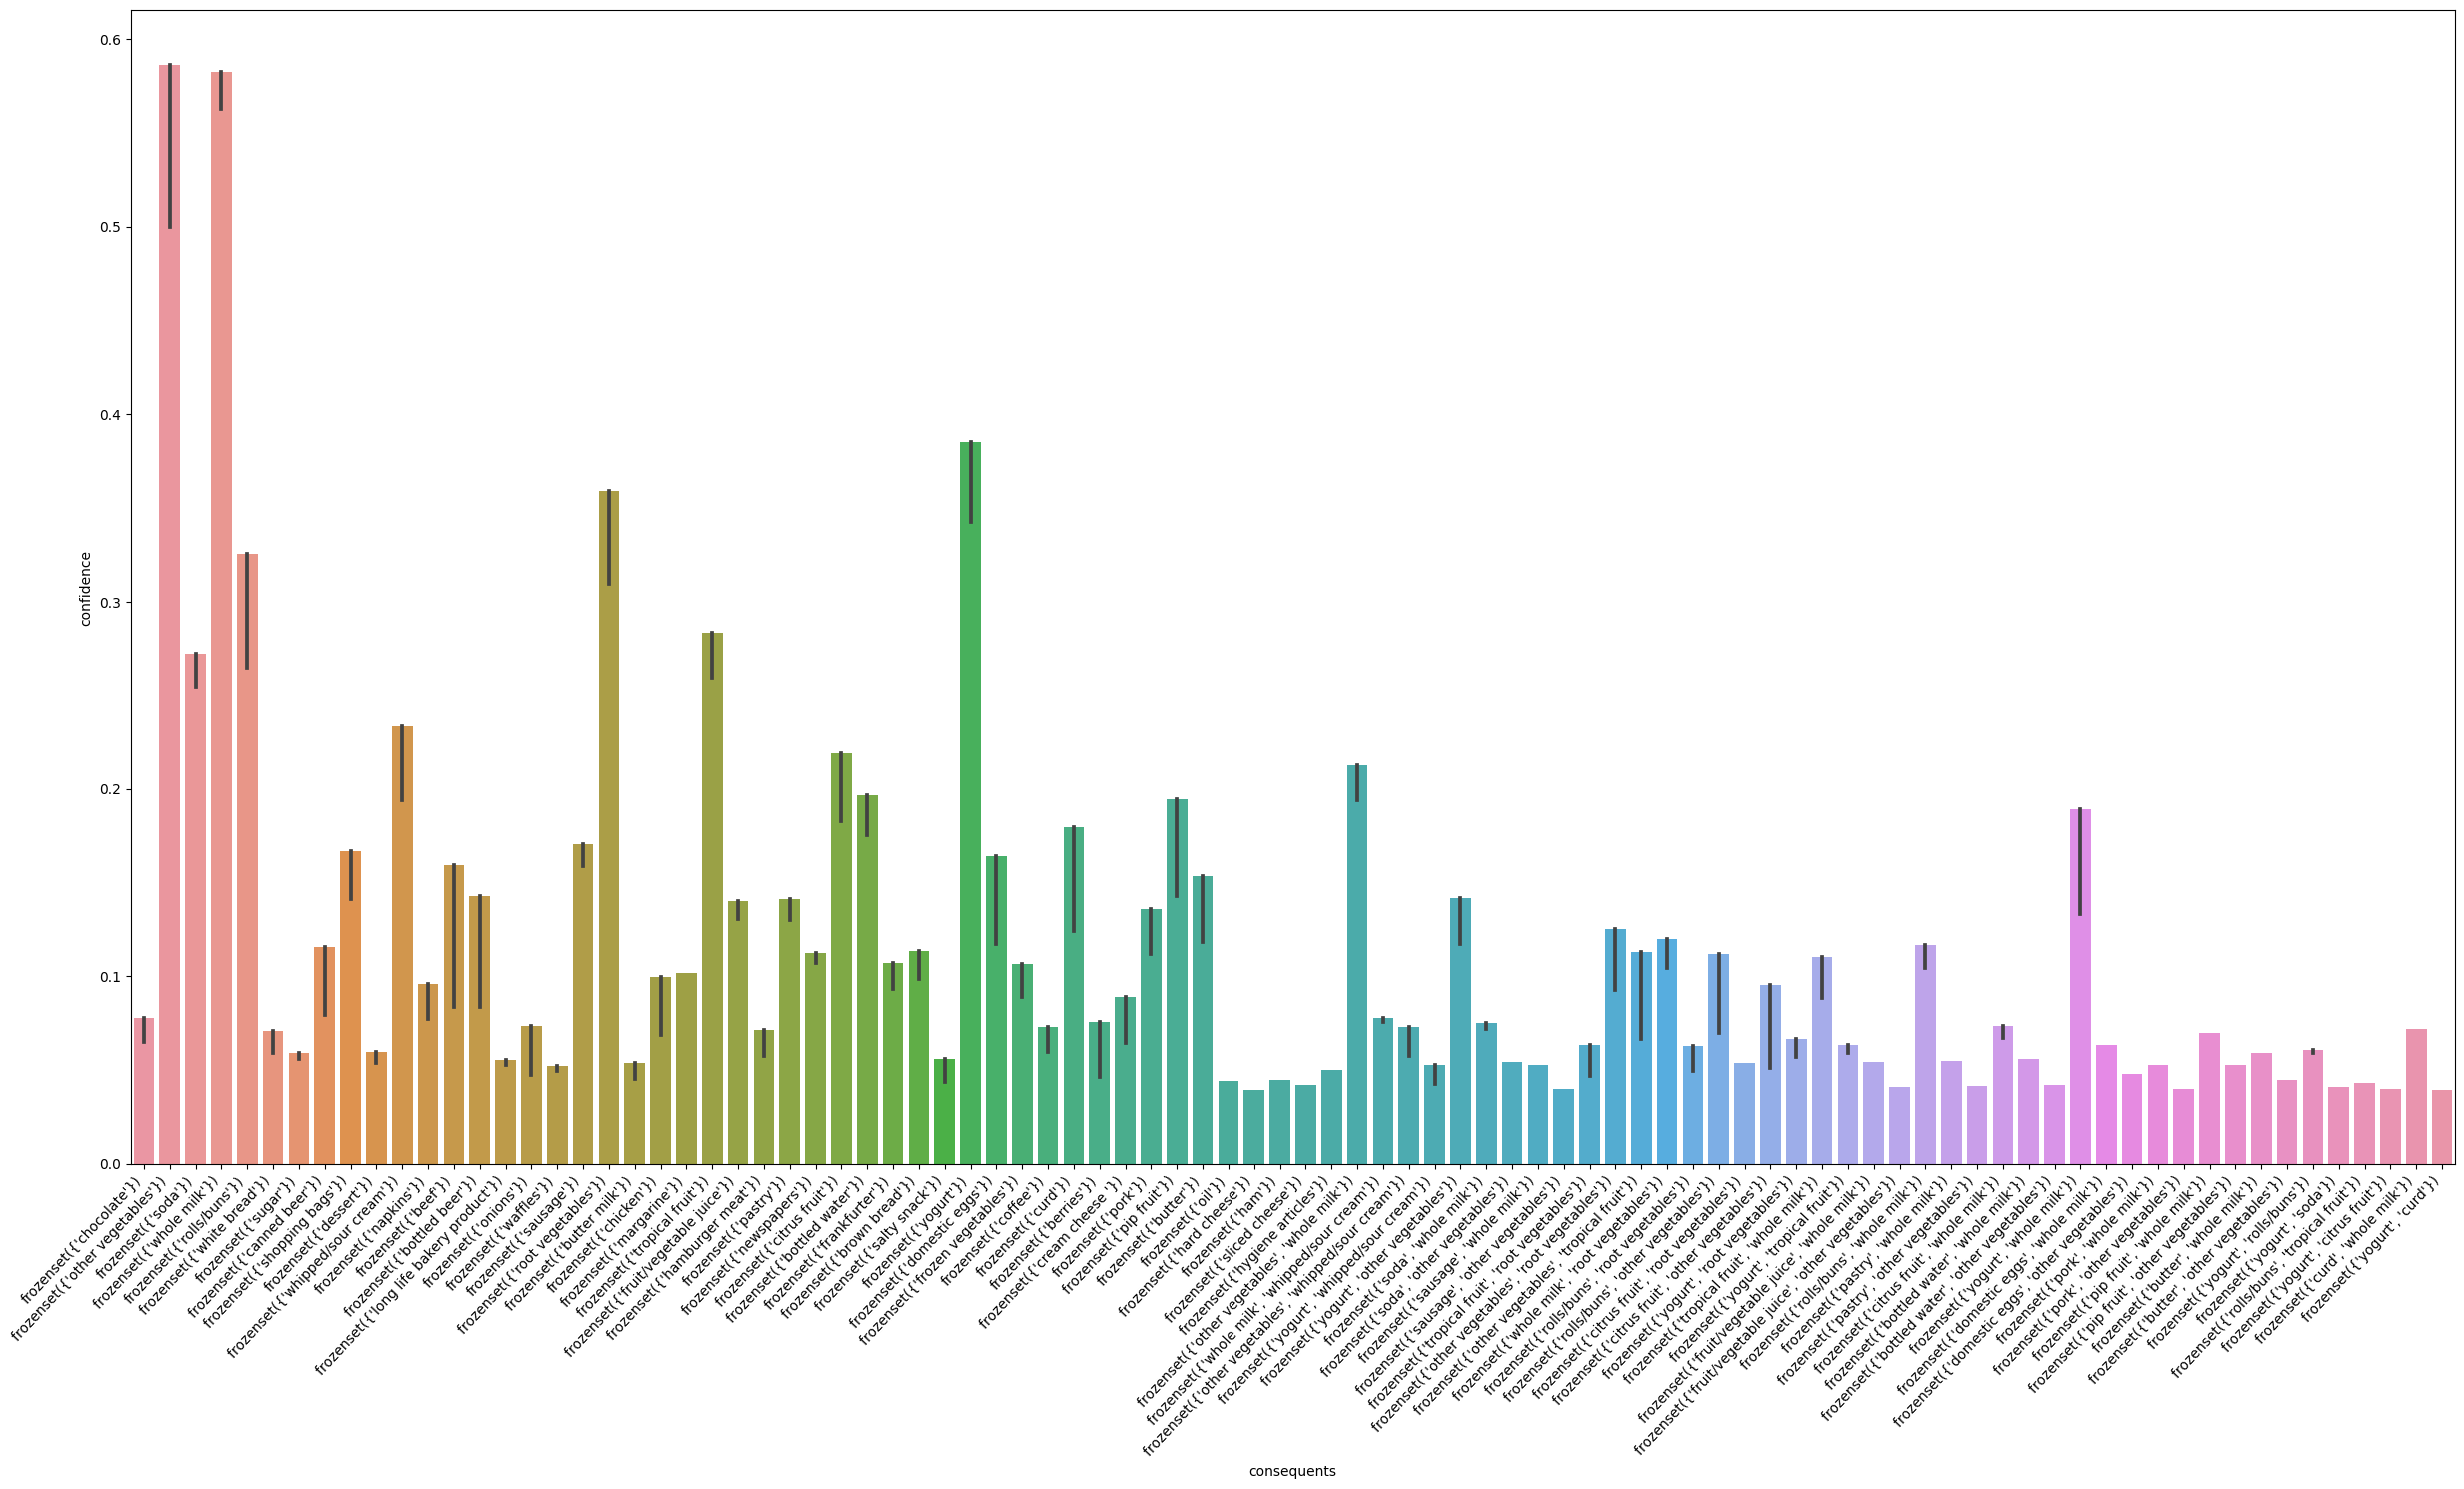

In [7]:
%matplotlib inline
fig,ax=plt.subplots()
fig.set_size_inches(30,15)
ax=sb.barplot(x='consequents',y='confidence',data=my_rules,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [8]:
my_list=my_rules.values.tolist()

In [9]:
print(my_list)

[[frozenset({'other vegetables'}), frozenset({'chocolate'}), 0.1934926283680732, 0.04961870869344179, 0.012709710218607015, 0.06568575932737782, 1.3238103339851657, 0.0031088558572832, 1.0171966239349721], [frozenset({'chocolate'}), frozenset({'other vegetables'}), 0.04961870869344179, 0.1934926283680732, 0.012709710218607015, 0.25614754098360654, 1.3238103339851657, 0.0031088558572832, 1.084230295747604], [frozenset({'soda'}), frozenset({'chocolate'}), 0.17437722419928825, 0.04961870869344179, 0.013523131672597865, 0.07755102040816327, 1.5629391100702577, 0.004870758982282394, 1.0302806034075522], [frozenset({'chocolate'}), frozenset({'soda'}), 0.04961870869344179, 0.17437722419928825, 0.013523131672597865, 0.2725409836065574, 1.5629391100702577, 0.004870758982282394, 1.1349406044809782], [frozenset({'chocolate'}), frozenset({'whole milk'}), 0.04961870869344179, 0.25551601423487547, 0.016675139806812404, 0.3360655737704918, 1.3152427051463536, 0.003996765129982793, 1.121321558806731],

In [10]:
'''0-antecedent
1-consequent
2-ant support
3-cons support
4-support
5-confidence
6-lift'''

'0-antecedent\n1-consequent\n2-ant support\n3-cons support\n4-support\n5-confidence\n6-lift'

In [ ]:
print("Enter itemname")
item_bought=input()

In [52]:
new_list=[]
for i in my_list:
    if item_bought in i[0]:
        new_list.append(i)

In [53]:
df = pd.DataFrame(new_list) 

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8
0,(coffee),(other vegetables),0.058058,0.193493,0.013421,0.231173,1.194740,0.002188,1.049011
1,(coffee),(whole milk),0.058058,0.255516,0.018709,0.322242,1.261141,0.003874,1.098451
2,(coffee),(rolls/buns),0.058058,0.183935,0.010981,0.189142,1.028309,0.000302,1.006422


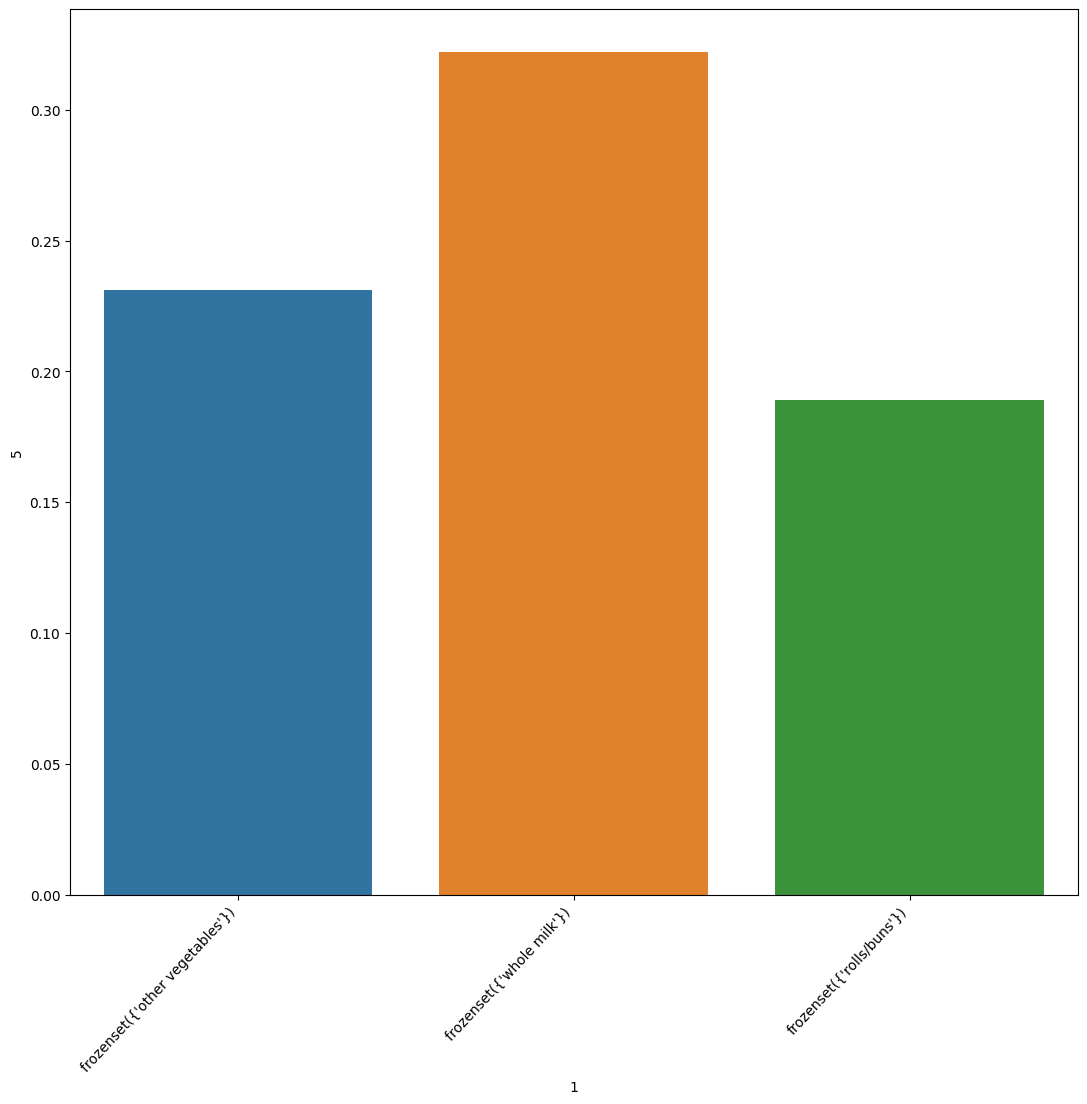

In [55]:
%matplotlib inline
fig,ax=plt.subplots()
fig.set_size_inches(13,11.5)
ax=sb.barplot(x=1,y=5,data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [56]:

print(f"ITEMS THAT ARE FREQUENTLY BOUGHT TOGETHER WITH {item_bought.upper()}:\n")
for i in my_list:
    if item_bought in i[0] and i[5]>0.1 and i[4]>0.015:
        print(f"item name: {i[1]}\nconfidence: {i[5]}\nsupport: {i[4]}\nlift: {i[6]}")
        print("\n")


ITEMS THAT ARE FREQUENTLY BOUGHT TOGETHER WITH COFFEE:

item name: frozenset({'whole milk'})
confidence: 0.3222416812609457
support: 0.018708693441789527
lift: 1.261140841703701


